In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from haversine import haversine, Unit
import geopandas as gpd
from pyproj import Proj, transform
import contextily as ctx
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.stattools import pacf,acf
pd.set_option('display.max_columns', None)

In [3]:
meteo_df = pd.read_pickle(os.path.join('..','data','processed','meteo_processed.pkl'),compression='zip')
meteo_df = meteo_df.iloc[2:]
meteo_df = meteo_df.set_index('date')

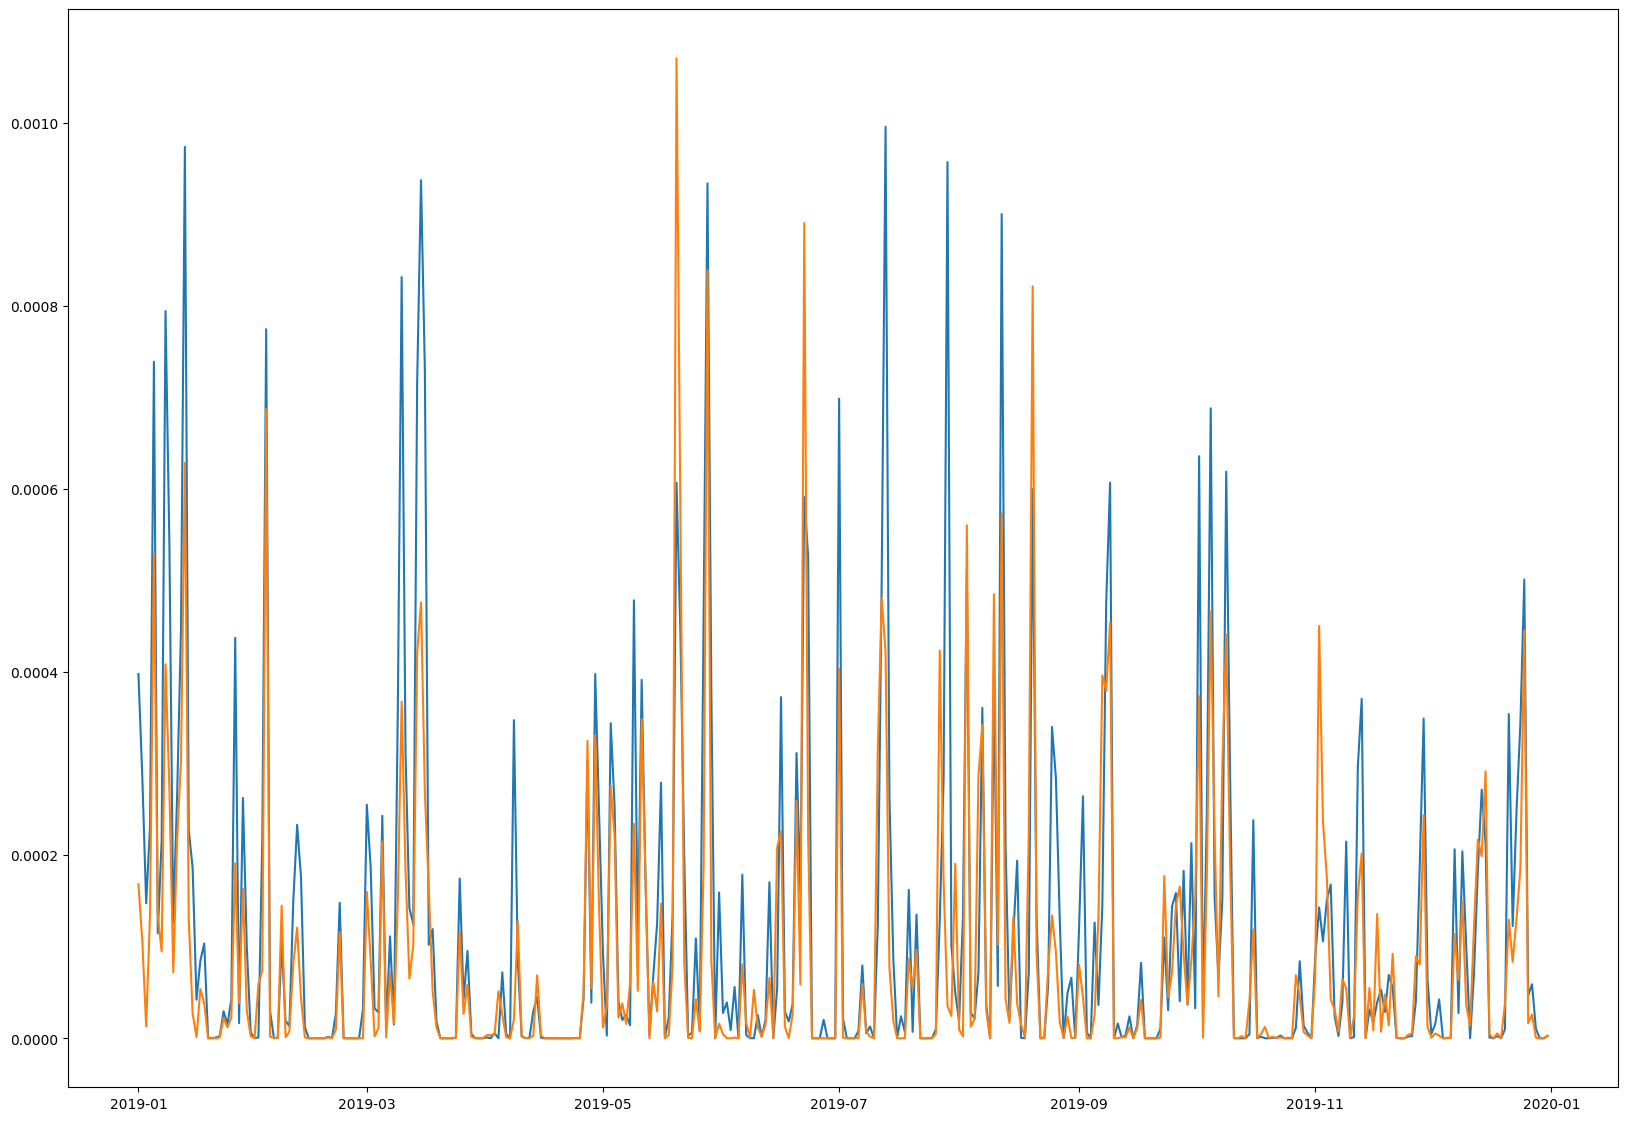

In [4]:
plt.figure(figsize=(20, 14))
plt.plot(meteo_df['tp_8800']['2019'])
plt.plot(meteo_df['tp_8120']['2019'])

<Axes: >

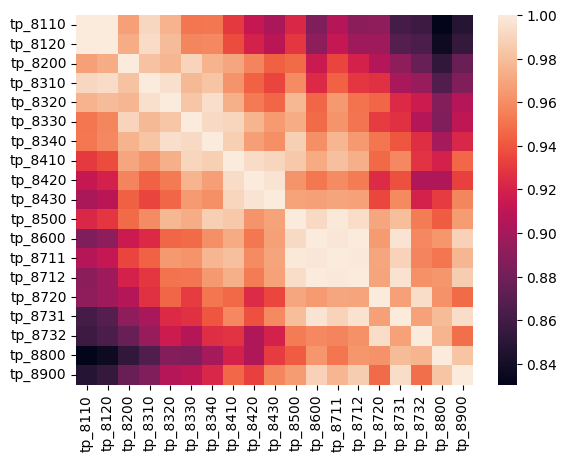

In [5]:
sns.heatmap(meteo_df[[col for col in meteo_df.columns if 'tp' in col]].corr())

<Axes: >

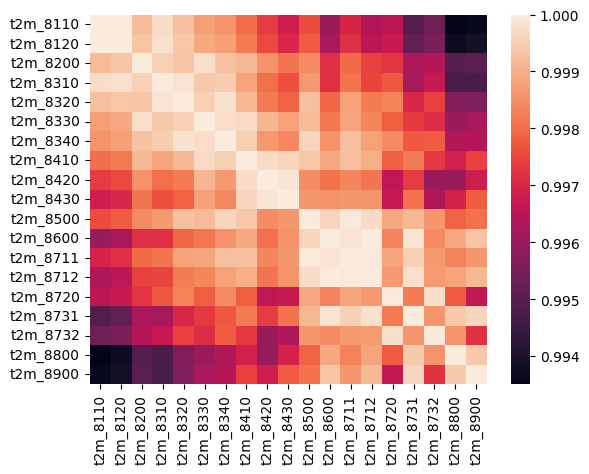

In [6]:
sns.heatmap(meteo_df[[col for col in meteo_df.columns if 't2m' in col]].corr())

<Axes: >

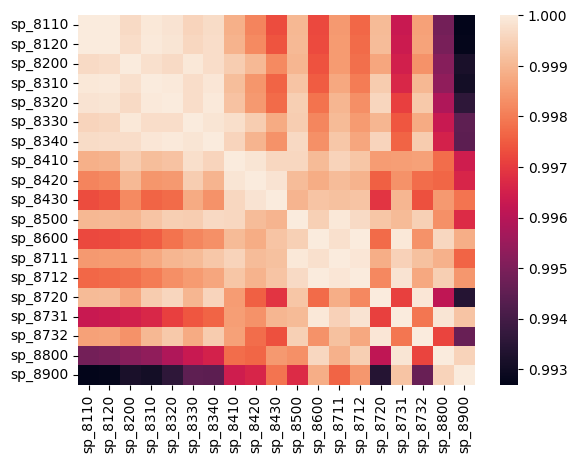

In [11]:
sns.heatmap(meteo_df[[col for col in meteo_df.columns if 'sp' in col]].corr())